## Datan analysointi K2021 Tehtävät kerta 5

**Opiskelijan nimi:**

Harjoituskerran 5 tehtävistä palautetaan Moodleen tiedosto muodossa **harjoitus5_etunimi_sukunimi.ipynb**. Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville. Vain ajetut ratkaisut voidaan arvioida. Tehtäväsi arvioidaan pistein:

* 1,0 p. Vastaus on täysin oikein.
* 0,5 p. Vastaus on osittain oikein.
* 0 p. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti muodossa). Ratkaisusi on oikein, jos saat saman kuvan kuin esimerkkivastauksessa.



## 1. Säädatan esittäminen

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake 'aika, s', joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarake 'Air temperature, degC',
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty pystyakselilla,
* em. kuvaajassa datapisteitä on merkitty punaisella pisteellä,
* punaista pistettä esittävälle datalle on merkitty selite (legend), jossa lukee 'ilman lämpötila',
* vaaka-akelin otsikoksi on kirjoitettu 'aika, s' ja pystyakselin otsikoksi 'ilman lämpötila $^{o}C$ ',
* huomaa, että voit akselin otsikkoon voit merkitä fysikaalisen yksikön [TeX syntaksilla](https://en.wikipedia.org/wiki/TeX),
* lisää kuvaajaan ruudukko, jossa on musta katkoviiva.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava1.png" width="450"/>


   aika, s  Air temperature, degC
1    600.0                    6.2
2   1200.0                    5.7
3   1800.0                    5.7
4   2400.0                    5.7
5   3000.0                    5.5


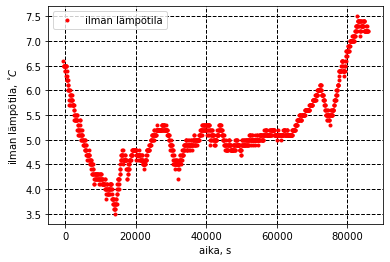

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

df = pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv', sep=',', decimal='.')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0']).sort_values()
df["aika, s"] = df['Unnamed: 0'].diff(1).dt.total_seconds().cumsum()
df = df[['aika, s', 'Air temperature, degC']]
df = df.dropna()
print(df.head())

# Kuvaaja:
# aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty 
# pystyakselilla. em. kuvaajassa datapisteitä on merkitty punaisella pisteellä,
plt.plot(df['aika, s'], df['Air temperature, degC'], 'r.')
#punaista pistettä esittävälle datalle on merkitty selite (legend), jossa lukee 'ilman lämpötila',
plt.legend(['ilman lämpötila'], loc='upper left')
# vaaka-akelin otsikoksi on kirjoitettu 'aika, s' ja pystyakselin otsikoksi 'ilman lämpötila  𝑜𝐶  ',
plt.xlabel('aika, s')
plt.ylabel('ilman lämpötila, $^{\circ}C$')
# lisää kuvaajaan ruudukko, jossa on musta katkoviiva.
plt.grid(color = 'black', linestyle = '--', linewidth = 1)

plt.show()

## 2. Säädatan esittäminen (2)

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake 'aika, s', joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarakkeet 'Air temperature, degC' ja 'Wind speed, m/s',
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty vasemman puoleisella pystyakselilla ja tuulen nopeus sarakkeesta 'Wind speed, m/s' on esitetty oikean puoleisella pystyakselilla,
* em. kuvaajassa datapisteitä ('aika, s','Air temperature, degC') on merkitty punaisella pisteellä ja datapisteitä ('aika, s','Wind speed, m/s') on merkitty sinisellä pisteellä,
* datapisteiden ('aika, s','Air temperature, degC') selite 'ilman lämpötila' (legend) on esitetty kuvassa oikealla alhaalla,
* datapisteiden ('aika, s','Wind speed, m/s') selite 'tuulen nopeus' (legend) on esitetty kuvassa vasemmalla ylhäällä,
* x - akselilla on esitetty aika yksiköissä $\cdot 10^{3}$ s ja x-akselin otsikko on 'aika, $\cdot 10^{3}$ s',
* vasemman puoleisen y-akselin otsikkona on 'ilman lämpötila, $^{o}C$',
* oikean puoleisen y-akselin otsikkona on 'tuulen nopeus, m/s',
* muuta x-akselin asteikkojaotus esimerkkikuvan kaltaiseksi,
* lisää kuvaajaan ruudukko, jossa on musta katkoviiva,
* aseta kuvan taustan väriksi (RGB) '#D7F8FF',
* aseta kuvan otsikoksi 'Säätila Jyväskylän lentoasemalla'.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava2.png" width="450"/>

     aika, s  Air temperature, degC  Wind speed, m/s
144     60.0                    6.5              2.6
145    120.0                    6.5              2.5
146    180.0                    6.5              2.5
147    240.0                    6.5              2.5
148    300.0                    6.5              2.4


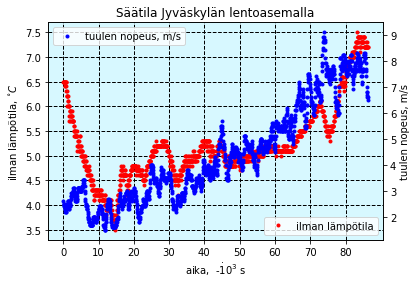

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv', sep=',', decimal='.')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.sort_values(by=('Unnamed: 0'))
df["aika, s"] = df['Unnamed: 0'].diff(1).dt.total_seconds().cumsum()
# lisää uuteen DataFrameen sarakkeet 'Air temperature, degC' ja 'Wind speed, m/s'
df = df[['aika, s', 'Air temperature, degC', 'Wind speed, m/s']]
df = df.dropna()
print(df.head())

# Kuvaaja:
# aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty 
# pystyakselilla. em. kuvaajassa datapisteitä on merkitty punaisella pisteellä,
fig, ax1 = plt.subplots()
# aseta kuvan taustan väriksi (RGB) '#D7F8FF',
ax1 = plt.axes()
ax1.set_facecolor("#D7F8FF")
# lisää kuvaajaan ruudukko, jossa on musta katkoviiva.
plt.grid(color = 'black', linestyle = '--', linewidth = 1)
ax2 = ax1.twinx()
ax1.plot(df['aika, s']/1000, df['Air temperature, degC'], 'r.')
ax2.plot(df['aika, s']/1000, df['Wind speed, m/s'], 'b.')
# muuta x-akselin asteikkojaotus esimerkkikuvan kaltaiseksi
x_ticks = np.arange(0, 90, 10)
plt.xticks(x_ticks)
# vaihtoehtoinen tapa:
#ax1.set_xticks(range(0, 90, 10))
#datapisteiden ('aika, s','Air temperature, degC') selite 'ilman lämpötila' (legend) on esitetty kuvassa oikealla alhaalla,
ax1.legend(['ilman lämpötila'], loc='lower right')
#datapisteiden ('aika, s','Wind speed, m/s') selite 'tuulen nopeus' (legend) on esitetty kuvassa vasemmalla ylhäällä
ax2.legend(['tuulen nopeus, m/s'], loc='upper left')
# vasemman puoleisen y-akselin otsikkona on 'ilman lämpötila,  𝑜𝐶 '
ax1.set_ylabel('ilman lämpötila, $^{\circ}C$')
# oikean puoleisen y-akselin otsikkona on 'tuulen nopeus, m/s'
ax2.set_ylabel('tuulen nopeus, m/s')
# x - akselilla on esitetty aika yksiköissä  ⋅103  s ja x-akselin otsikko on 'aika,  ⋅103  s', 
ax1.set_xlabel('aika,  -$\dot 10^3$ s')
# aseta kuvan otsikoksi 'Säätila Jyväskylän lentoasemalla'.
plt.title('Säätila Jyväskylän lentoasemalla')

plt.show()

## 3. Autodatan esittäminen

#### Datan esikäsittely

Lataa data DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv), kun olet huomioinut sarakkeiden erotinmerkit '\t'. Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake 'Mh') on enemmän kuin 50 autoa. Muuta uudessa DataFramessa sarakkeen 'Ft' merkkijonojen 'DIESEL' tilalle 'Diesel' ja 'PETROL' tilalle 'Petrol'. Jos sarakkeessa 'Ft' on merkkijono 'NG', korvaa se merkkijonolla 'Natural gas'.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen kuvaaja, jossa hyödynnät tuottamasi DataFramen sarakkeita autojen polttoainetyypin 'Ft' ja auton valmistajan 'Mh' osalta.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava3.png" width="500"/>

      Mh      Ft
0  SKODA  Petrol
1  SKODA  Petrol
2  SKODA  Diesel
3  SKODA  Petrol
4  SKODA  Diesel


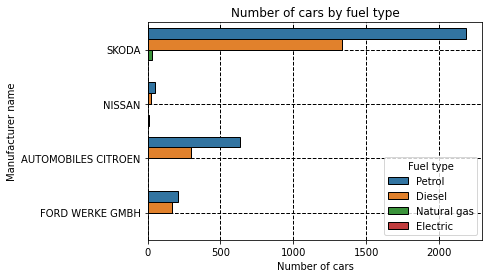

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv', sep='\t')
maski = df['Mh'].value_counts() # laskee kunkin autovalmistajan automerkit
# Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake 'Mh') on enemmän kuin 50 autoa.
merkit = list(maski[maski>50].index) 
df = df[df['Mh'].isin(merkit)]
# Muuta uudessa DataFramessa sarakkeen 'Ft' merkkijonojen 'DIESEL' tilalle 'Diesel' ja 'PETROL' tilalle 'Petrol'
df['Ft'] = df['Ft'].str.capitalize()
# Jos sarakkeessa 'Ft' on merkkijono 'NG', korvaa se merkkijonolla 'Natural gas'
df['Ft'] = df['Ft'].replace('Ng', 'Natural gas')
df = df[['Mh', 'Ft']]
print(df.head())

ax = sns.countplot(y='Mh', data=df, hue='Ft', edgecolor="k")
ax.grid(color = 'black', linestyle = '--', linewidth = 1)
ax.legend(title='Fuel type', loc='lower right')
ax.set_ylabel('Manufacturer name')
ax.set_xlabel('Number of cars')
ax.set_title('Number of cars by fuel type')
ax.set_axisbelow(True)

## 4. Autodatan esittäminen (2)

#### Datan esikäsittely

Lataa data DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv), kun olet huomioinut sarakkeiden erotinmerkit '\t'. Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake 'Mh') on enemmän kuin 50 autoa ja sarakkeessa 'Enedc (g/km)' on nollaa suurempia arvoja.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen histogrammi, josta käy ilmi $CO_2$ päästöjen (sarake 'Enedc (g/km)') jakautuminen 100 eri lukualuevälin mukaan sekä kumulatiivinen histogrammi $CO_2$ päästöistä (sarake 'Enedc (g/km)'). Otathan huomioon logaritmisen asteikon todennäköisyystiheysjakaumille.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava4.png" width="500"/>


## 5. Useita kuvaajia

Tee tehtävien 1-4 kuvaajat samaan kuvaan alla olevan esimerkkikuvan mukaisesti. Kuvissa tulee säilyä samat tyylit, mutta niiden koko voi muuttua.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava5.png" width="1000"/>
